<a href="https://colab.research.google.com/github/jbshirk/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module1-join-and-reshape-data/Joseph_Shirk_LS_DS_121_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [1]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-09-19 00:20:24--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.37.94
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.37.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  8.49MB/s    in 10s     

2019-09-19 00:20:39 (19.4 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [2]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [3]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [4]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
import pandas as pd

In [6]:
top_10 = ['Banana',
    'Bag of Organic Bananas',
    'Organic Strawberries',
    'Organic Baby Spinach',
    'Organic Hass Avocado',
    'Organic Avocado',
    'Large Lemon',
    'Strawberries',
    'Limes',
    'Organic Whole Milk']
print(top_10)

['Banana', 'Bag of Organic Bananas', 'Organic Strawberries', 'Organic Baby Spinach', 'Organic Hass Avocado', 'Organic Avocado', 'Large Lemon', 'Strawberries', 'Limes', 'Organic Whole Milk']


In [0]:
order_products__prior = pd.read_csv('order_products__prior.csv')
order_products__train = pd.read_csv('order_products__train.csv')

In [12]:
order_products__prior.shape,order_products__train.shape

((32434489, 4), (1384617, 4))

Need:
order_products JOIN/MERGE
- order id
- product id
- add to cart order (sequence)

products
- product id
- product name

In [0]:

products = pd.read_csv('products.csv')

In [14]:
order_products = pd.concat([order_products__prior, order_products__train])
order_products.shape 

(33819106, 4)

In [0]:
assert len(order_products) == len(order_products__prior) +len(order_products__train)

In [23]:
top_10

['Banana',
 'Bag of Organic Bananas',
 'Organic Strawberries',
 'Organic Baby Spinach',
 'Organic Hass Avocado',
 'Organic Avocado',
 'Large Lemon',
 'Strawberries',
 'Limes',
 'Organic Whole Milk']

In [25]:
products[products['product_name'].isin(top_10)]

,product_id,product_name,aisle_id,department_id
13175,13176,Bag of Organic Bananas,24,4
16796,16797,Strawberries,24,4
21136,21137,Organic Strawberries,24,4
21902,21903,Organic Baby Spinach,123,4
24851,24852,Banana,24,4
26208,26209,Limes,24,4
27844,27845,Organic Whole Milk,84,16
47208,47209,Organic Hass Avocado,24,4
47625,47626,Large Lemon,24,4
47765,47766,Organic Avocado,24,4


In [30]:
products[products['product_name'].isin(top_10)] == True

,product_id,product_name,aisle_id,department_id
13175,False,False,False,False
16796,False,False,False,False
21136,False,False,False,False
21902,False,False,False,False
24851,False,False,False,False
26208,False,False,False,False
27844,False,False,False,False
47208,False,False,False,False
47625,False,False,False,False
47765,False,False,False,False


In [32]:
products_top_10 = (products[products['product_name'].isin(top_10)] == True)
products_top_10.head(30) #this isn't working

,product_id,product_name,aisle_id,department_id
13175,False,False,False,False
16796,False,False,False,False
21136,False,False,False,False
21902,False,False,False,False
24851,False,False,False,False
26208,False,False,False,False
27844,False,False,False,False
47208,False,False,False,False
47625,False,False,False,False
47765,False,False,False,False


In [34]:

#EX: orders[orders['order_number'].isin([1,2])]
columns = ['product_id', 'product_name']

products_subset = products[products['product_name'].isin(top_10)][columns]
products_subset.head(11)

,product_id,product_name
13175,13176,Bag of Organic Bananas
16796,16797,Strawberries
21136,21137,Organic Strawberries
21902,21903,Organic Baby Spinach
24851,24852,Banana
26208,26209,Limes
27844,27845,Organic Whole Milk
47208,47209,Organic Hass Avocado
47625,47626,Large Lemon
47765,47766,Organic Avocado


In [37]:
products_ordered = pd.merge(products_subset,order_products)
products_ordered.head()

,product_id,product_name,order_id,add_to_cart_order,reordered
0,13176,Bag of Organic Bananas,5,1,1
1,13176,Bag of Organic Bananas,27,1,1
2,13176,Bag of Organic Bananas,29,3,1
3,13176,Bag of Organic Bananas,32,3,1
4,13176,Bag of Organic Bananas,42,3,1


In [39]:
products_ordered.groupby('product_name')['reordered'].count()

product_name
Bag of Organic Bananas    394930
Banana                    491291
Large Lemon               160792
Limes                     146660
Organic Avocado           184224
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Strawberries      275577
Organic Whole Milk        142813
Strawberries              149445
Name: reordered, dtype: int64

## Reshape Data Section

- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
- Table 2 --> Tidy
- Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

## LOST
https://github.com/alex000kim/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module1-join-and-reshape-data/LS_DSPT3_121_Join_and_Reshape_Data.ipynb

I'm not finding any mention of other dataset or other code or skipped cells in the lecture.

Only datasets from the lecture are:
- Instacart
- treatments


In [0]:
import seaborn as sns # I blew half an hour finding this

In [0]:
flights = sns.load_dataset('flights')

In [45]:

flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [59]:
flightstransp = flights.T
flightstransp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143
year,1949,1949,1949,1949,1949,1949,1949,1949,1949,1949,1949,1949,1950,1950,1950,1950,1950,1950,1950,1950,1950,1950,1950,1950,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951,1952,1952,1952,1952,...,1957,1957,1957,1957,1958,1958,1958,1958,1958,1958,1958,1958,1958,1958,1958,1958,1959,1959,1959,1959,1959,1959,1959,1959,1959,1959,1959,1959,1960,1960,1960,1960,1960,1960,1960,1960,1960,1960,1960,1960
month,January,February,March,April,May,June,July,August,September,October,November,December,January,February,March,April,May,June,July,August,September,October,November,December,January,February,March,April,May,June,July,August,September,October,November,December,January,February,March,April,...,September,October,November,December,January,February,March,April,May,June,July,August,September,October,November,December,January,February,March,April,May,June,July,August,September,October,November,December,January,February,March,April,May,June,July,August,September,October,November,December
passengers,112,118,132,129,121,135,148,148,136,119,104,118,115,126,141,135,125,149,170,170,158,133,114,140,145,150,178,163,172,178,199,199,184,162,146,166,171,180,193,181,...,404,347,305,336,340,318,362,348,363,435,491,505,404,359,310,337,360,342,406,396,420,472,548,559,463,407,362,405,417,391,419,461,472,535,622,606,508,461,390,432


In [60]:
flights.index

RangeIndex(start=0, stop=144, step=1)

In [0]:
flights.reset_index() # I don't think I really want to do this

## Table 2 --> Tidy


In [0]:
tidyflights = flights.melt(id_vars=['year','month'])

In [64]:
tidyflights.head()

,year,month,variable,value
0,1949,January,passengers,112
1,1949,February,passengers,118
2,1949,March,passengers,132
3,1949,April,passengers,129
4,1949,May,passengers,121


In [0]:
tidyflights.columns =['year','month','passengers','count']

In [66]:
tidyflights.head()

,year,month,passengers,count
0,1949,January,passengers,112
1,1949,February,passengers,118
2,1949,March,passengers,132
3,1949,April,passengers,129
4,1949,May,passengers,121


## Tidy --> Table 2


## create a pivot table 
showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [69]:
tidyflights.pivot_table(index='year',columns='month',values='count')

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


In [0]:
# EX sns.catplot(x='trt', y='result', col='name', kind='bar', data=tidy, height=3);

In [0]:
sns.catplot(x='year', y='count', col='month', 
            kind='bar', data=tidyflights, height=3, col_wrap=4);

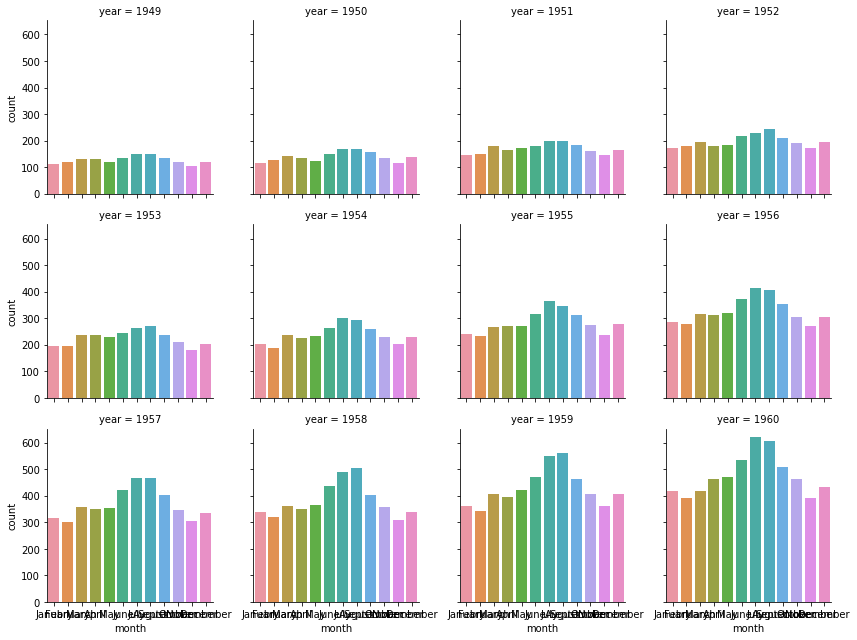

In [74]:
sns.catplot(x='month', y='count', col='year', 
            kind='bar', data=tidyflights, height=3,col_wrap=4);

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
order_products.groupby('product_id')['reordered'].count()

In [79]:
products_pop = (order_products.groupby('product_id')['reordered'].count() > 2900)
products_pop.head()

product_id
1    False
2    False
3    False
4    False
5    False
Name: reordered, dtype: bool

In [81]:
order_products[products_pop].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


IndexingError: ignored

In [0]:
order_products.groupby('product_id')['order_id'].top(25)

In [88]:
order_products['order_id'].top(25)

AttributeError: ignored

In [0]:
pd.merge((order_products.groupby('product_id')['reordered'].count()),)

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####